# House Prices Prediction

## Content



In [31]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from category_encoders import OneHotEncoder

import pickle
import joblib

%matplotlib inline

In [2]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

### Import and Explore Data

In [3]:
house_train = pd.read_csv('train.csv', index_col='Id')
print(house_train.shape)

# Make a copy
house = house_train.copy()

house.head()

(1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(house.isna().sum())

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

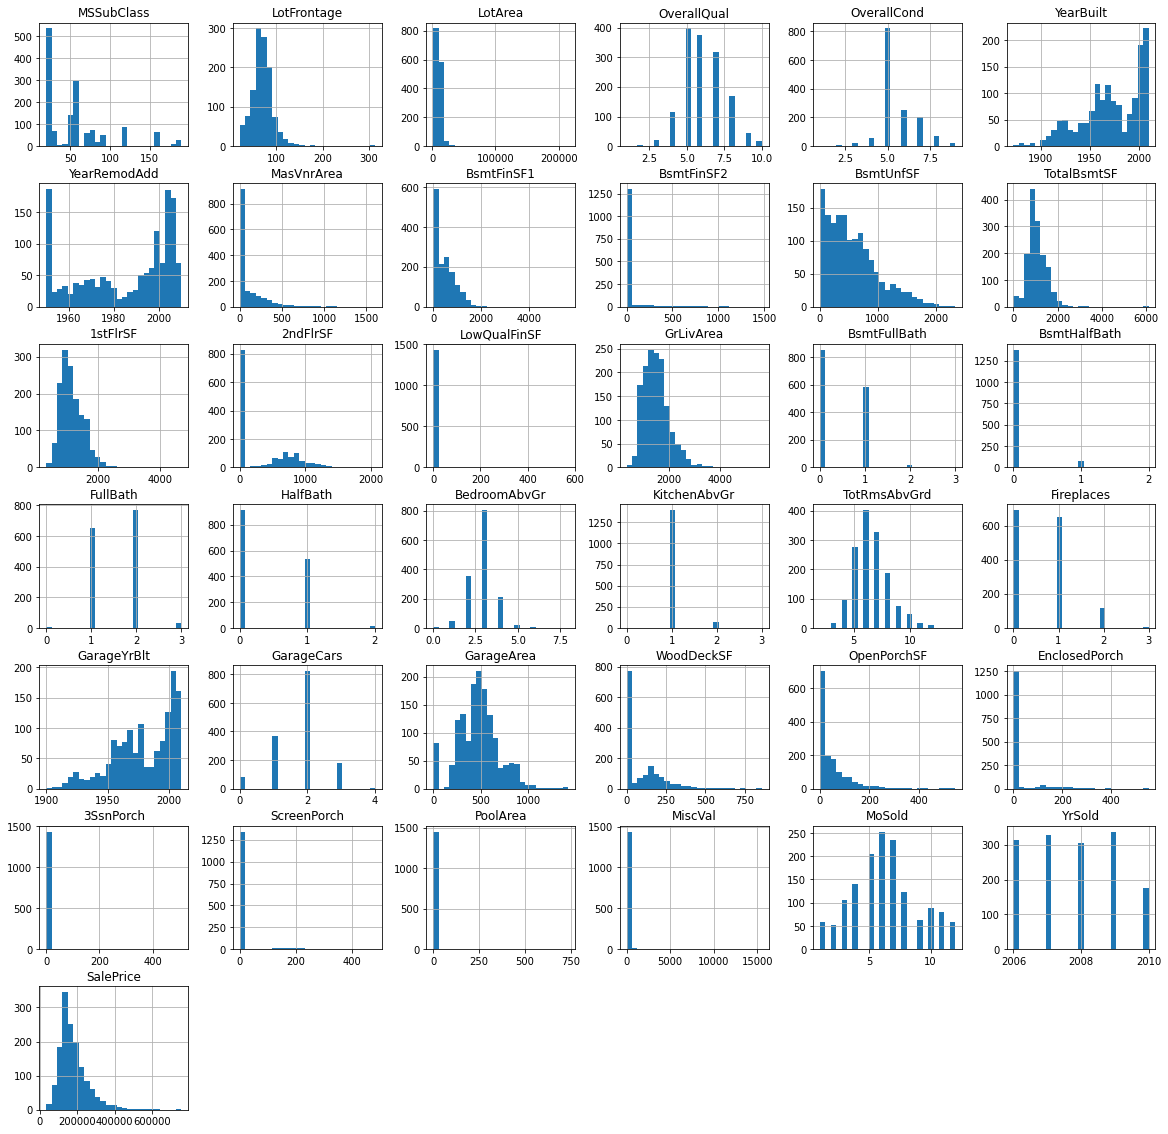

In [5]:
house.hist(bins=25, figsize=(20, 20));

In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
house.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
numerical_vars = house.select_dtypes('number')
categorical_vars = house.select_dtypes('object')

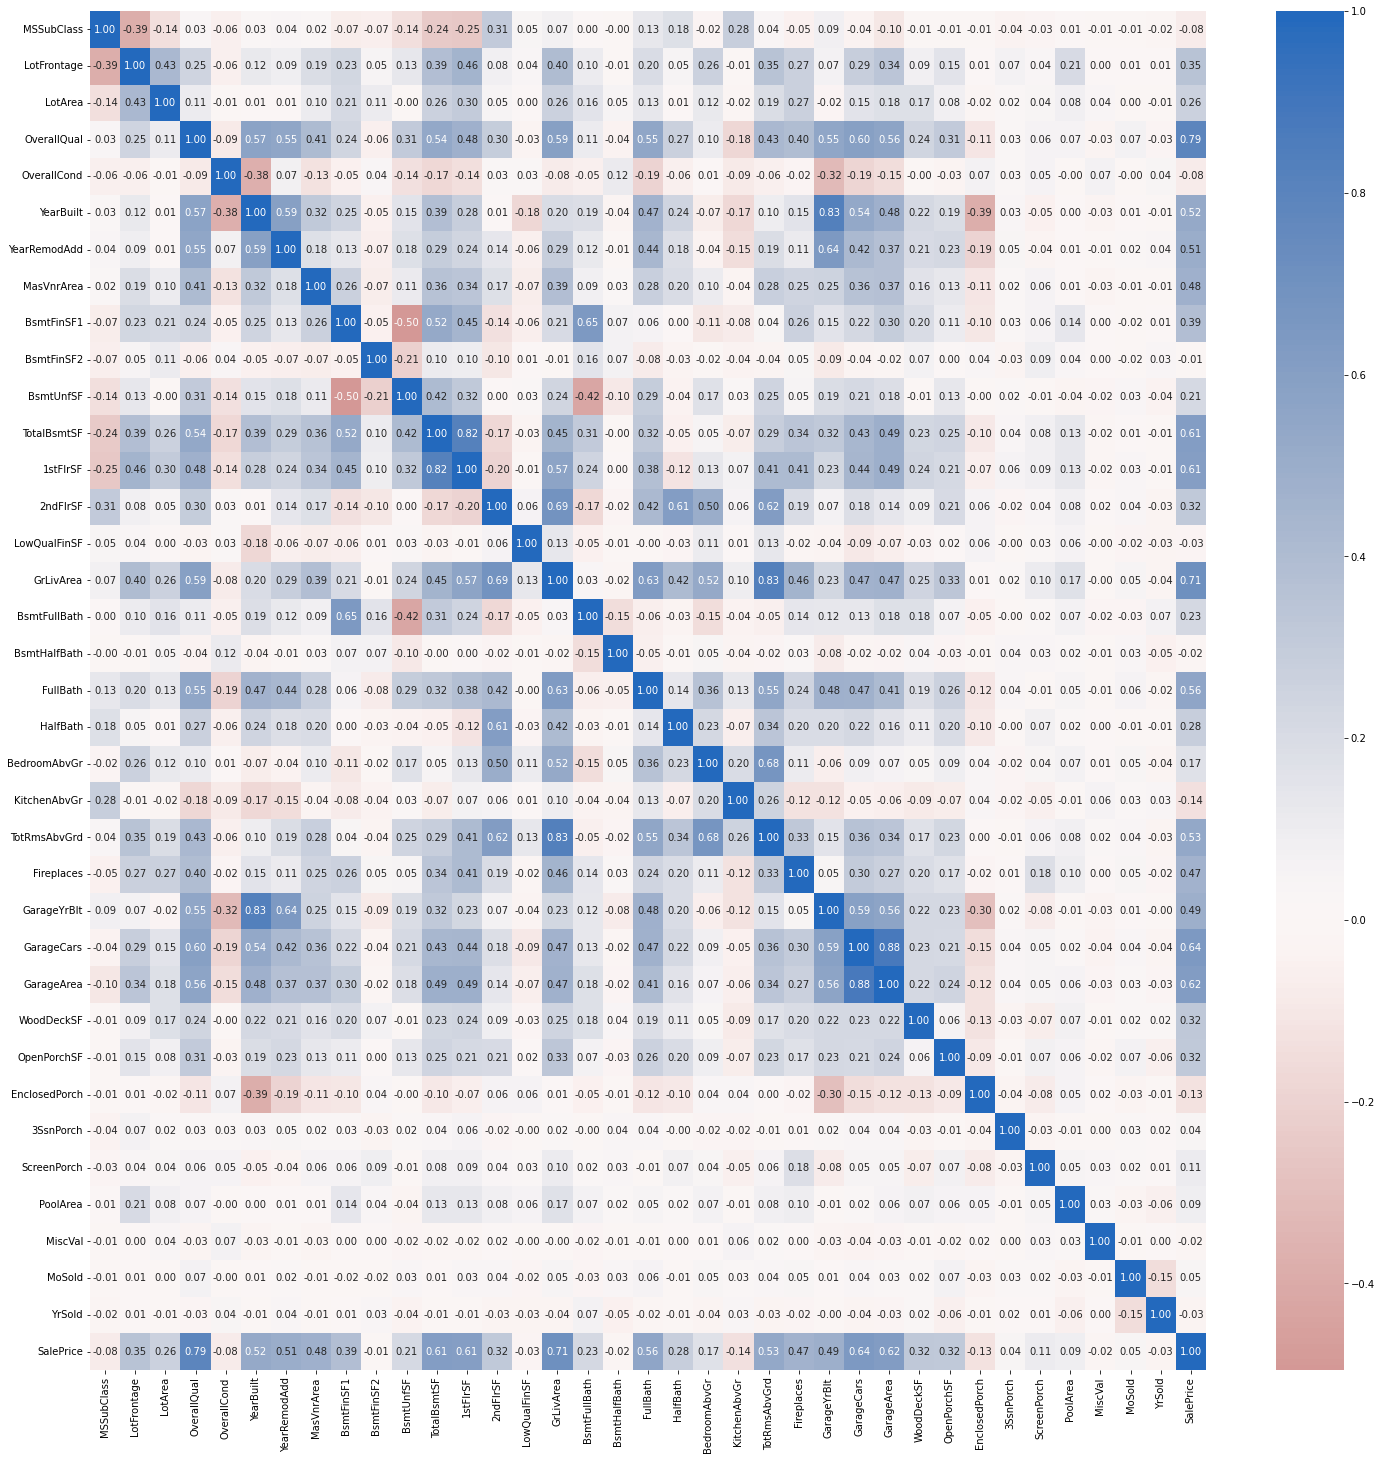

In [9]:
plt.figure(figsize = [25, 25])
sns.heatmap(house.corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0);

GarageCars: Size of garage in car capacity and GarageArea: Size of garage in square feet are highly positively correlated as the size determines the number of cars that it can occupy, the bigger the area, the greater the car capacity.

Recommendation: Drop one of the features specifically **GarageCars** due to multicollinearity to improve communication.

In [10]:
corr_matrix = house.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [11]:
attribute =corr_matrix['SalePrice'].sort_values(ascending=False).index[0:10].to_list()

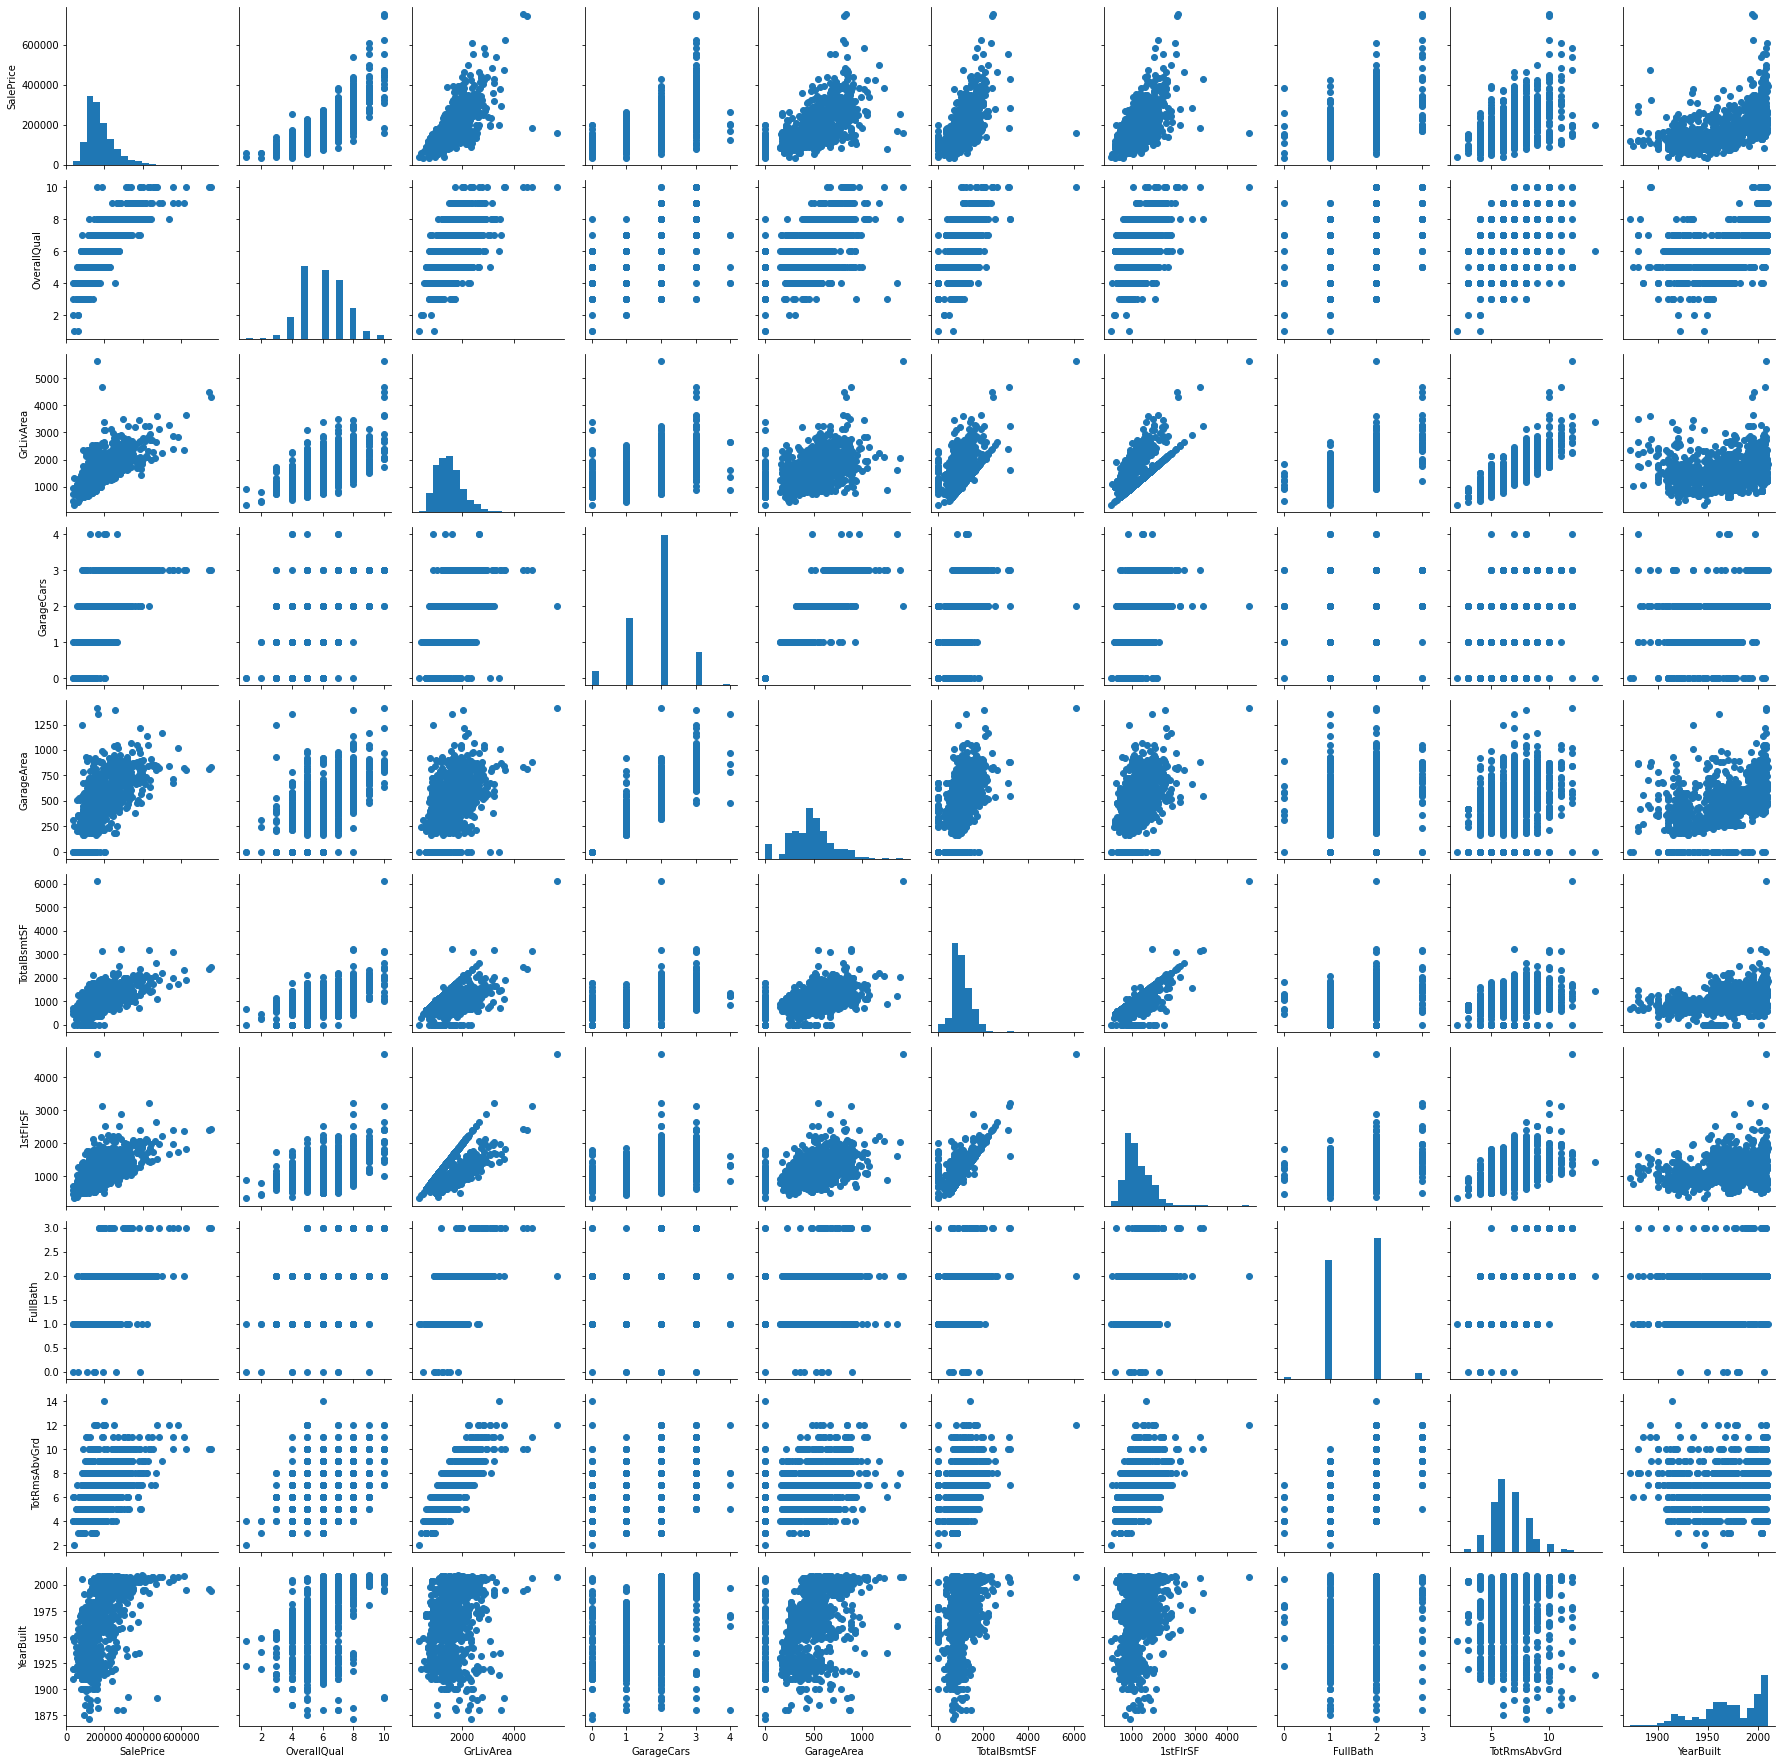

In [12]:
g = sns.PairGrid(data=house, vars=attribute)
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist, bins=20);

There is a strong positive correlation between the price of the apartment (SalePrice)with the quality of building (OverallQual) and the size and areas covered (e.g. GrLivArea, GarageCars, GarageArea, TotalBsmtSF). These variables have strong predictive power for the price of the building.

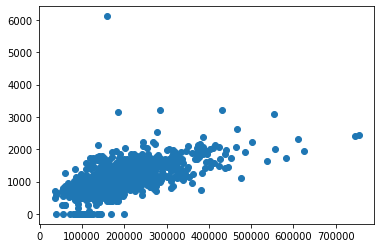

In [13]:
plt.scatter(house.SalePrice, house.TotalBsmtSF);

In [14]:
# Create list of columns with less than 100 values
cols_to_drop = ['Alley', 'PoolQC', 'MiscFeature', 'GarageCars']

# Drop columns wit high amount of missing values
house.drop(columns=cols_to_drop, inplace=True)

## Split Data

In [15]:
X = house.drop(columns='SalePrice')
y= house['SalePrice']

print("Training data shape {} and Test data shape {}".format(X.shape, y.shape))

Training data shape (1460, 75) and Test data shape (1460,)


In [16]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_val.shape)
print(y_val.shape)
print(X_train.shape)
print(y_train.shape)

(292, 75)
(292,)
(1168, 75)
(1168,)


## Train Initial Models

In [17]:
# Make Pipeline
models = {
    #'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor()
}

train_mae = []
train_r2 = []
val_mae = []
val_r2 = []

for model in models.values():
    pipeline = make_pipeline(
        OneHotEncoder(),
        SimpleImputer(),
        StandardScaler(),
        model
    )
    pipeline.fit(X_train, y_train)
    y_train_pred = pipeline.predict(X_train)
    train_mae.append(mean_absolute_error(y_train, y_train_pred))
    train_r2.append(pipeline.score(X_train, y_train))
    y_val_pred = pipeline.predict(X_val)
    val_mae.append(mean_absolute_error(y_val, y_val_pred))
    val_r2.append(pipeline.score(X_val, y_val))

c:\users\ajibola\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.268e+10, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


Linear Regression Model did not generalize well giving a mean absolute error of \\$2340379116365359.5000 on the validation test.

**Note** The Linear Regression will be excluded from further training.

In [18]:
print("Mean Absolute Error for training: {} and R Squared for training: {}".format(train_mae, train_r2))

Mean Absolute Error for training: [12747.65248407462, 12743.659593683826, 0.0, 6631.5521489726025, 10010.112888415424] and R Squared for training: [0.9355032714460354, 0.9355014131048105, 1.0, 0.9774101256941825, 0.969293859346492]


In [19]:
print("Mean Absolute Error for validation: {} and R Squared for validation: {}".format(val_mae, val_r2))

Mean Absolute Error for validation: [18528.805401289523, 18517.626146036084, 29310.02397260274, 17578.67058219178, 17468.302570023854] and R Squared for validation: [0.8938221036788921, 0.8937426803829782, 0.7457332252650493, 0.8880870402709862, 0.8984747404575176]


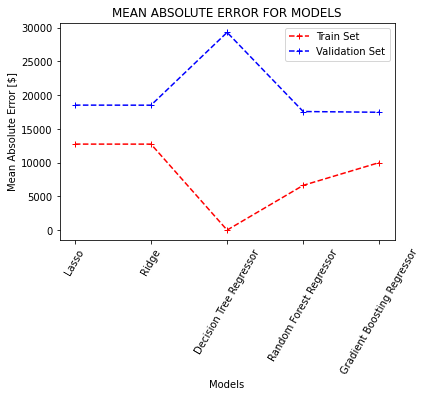

In [20]:
plt.plot(models.keys(), train_mae, 'r+--', label='Train Set')
plt.plot(models.keys(), val_mae, 'b+--', label='Validation Set')
plt.title('MEAN ABSOLUTE ERROR FOR MODELS')
plt.ylabel('Mean Absolute Error [$]')
plt.xlabel('Models')
plt.xticks(rotation=60)
plt.legend();

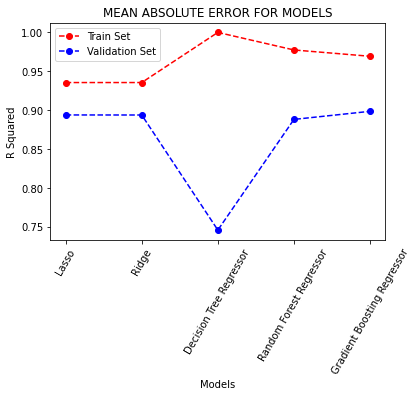

In [21]:
plt.plot(models.keys(), train_r2, 'ro--', label='Train Set')
plt.plot(models.keys(), val_r2, 'bo--', label='Validation Set')
plt.title('MEAN ABSOLUTE ERROR FOR MODELS')
plt.ylabel('R Squared')
plt.xlabel('Models')
plt.xticks(rotation=60)
plt.legend();

## Model Building using Gradient Boosting Regressor

In [22]:
# Instantiate final pipeline
final_GBR = make_pipeline(
        OneHotEncoder(),
        SimpleImputer(),
        StandardScaler(),
        GradientBoostingRegressor(random_state=42)
    )

# Instantiate KFold
#kf = KFold(n_splits=5)
# Define Gridsearch parameters
parameters = {
    "gradientboostingregressor__n_estimators": range(5, 26, 5),
    "gradientboostingregressor__max_depth": range(1, 6),
    "simpleimputer__strategy": ['mean', 'median']
}

final_model = GridSearchCV(final_GBR, param_grid=parameters, cv=5, verbose=-1 )

In [23]:
final_model.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                                       ('simpleimputer', SimpleImputer()),
                                       ('standardscaler', StandardScaler()),
                                       ('gradientboostingregressor',
                                        GradientBoostingRegressor(random_state=42))]),
             param_grid={'gradientboostingregressor__max_depth': range(1, 6),
                         'gradientboostingregressor__n_estimators': range(5, 26, 5),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=-1)

In [24]:
cv_result = pd.DataFrame(final_model.cv_results_).sort_values('rank_test_score')
cv_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gradientboostingregressor__max_depth,param_gradientboostingregressor__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
48,0.988206,0.009021,0.132304,0.002949,5,25,mean,"{'gradientboostingregressor__max_depth': 5, 'g...",0.874284,0.848244,0.860396,0.857150,0.807909,0.849597,0.022463,1
49,1.020741,0.017017,0.132816,0.005134,5,25,median,"{'gradientboostingregressor__max_depth': 5, 'g...",0.868958,0.848200,0.861657,0.855185,0.811252,0.849050,0.020111,2
38,0.922276,0.018046,0.137795,0.010019,4,25,mean,"{'gradientboostingregressor__max_depth': 4, 'g...",0.858185,0.818143,0.849620,0.858026,0.822229,0.841241,0.017516,3
39,0.932109,0.008301,0.144317,0.013494,4,25,median,"{'gradientboostingregressor__max_depth': 4, 'g...",0.858185,0.818322,0.850463,0.858026,0.816399,0.840279,0.018930,4
46,0.910564,0.008570,0.128524,0.005569,5,20,mean,"{'gradientboostingregressor__max_depth': 5, 'g...",0.856155,0.836076,0.844074,0.832195,0.783117,0.830323,0.024985,5


In [25]:
final_model.best_score_

0.84959661236398

In [26]:
final_model.best_params_

{'gradientboostingregressor__max_depth': 5,
 'gradientboostingregressor__n_estimators': 25,
 'simpleimputer__strategy': 'mean'}

In [27]:
y_final_pred = final_model.predict(X)
final_mae = mean_absolute_error(y, y_final_pred)
final_r2 = final_model.score(X, y)
final_rmse = np.sqrt(mean_squared_error(y, y_final_pred))

In [28]:
print("Mean Absolute Error for Grid Search CV for Gradient Boosting: ${:.4f} \nR-Squared Grid Search CV for Gradient Boosting: {:.4f}  \nRoot Mean Squared Error Grid Search CV for Gradient Boosting: ${:.4f}"
      .format(final_mae, final_r2, final_rmse))

Mean Absolute Error for Grid Search CV for Gradient Boosting: $12078.9306 
R-Squared Grid Search CV for Gradient Boosting: 0.9582  
Root Mean Squared Error Grid Search CV for Gradient Boosting: $16229.7520


This is a good result with **RMSE** of \\$16229.7520 is lower than the median value of the **SalePrice** in the training data of $163000.0000

### Save Model as .pkl

In [32]:
joblib.dump(final_model, "my_GBR_model.pkl")

['my_GBR_model.pkl']